# Medical Diagnosis with Random Forest
Build a machine learning model to predict whether the patients have diabetes or not.

Medical diagnosis is a very essential and critical aspect for healthcare professionals. In particular, classification of diabetics is very complex. An early identification of diabetes is much important in controlling diabetes. A patient has to go through several tests and later it is very difficult for the professionals to keep track of multiple factors at the time of diagnosis process which can lead to inaccurate results which makes the detection very challenging. Due to most advance technologies especially machine learning algorithms are very beneficial for the fast and accurate prediction of the disease in the healthcare industries.

## Dataset
### Context
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.
### Content
<li>Pregnancies: Number of times pregnant</li>
<li>Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test</li>
<li>BloodPressure: Diastolic blood pressure (mm Hg)</li>
<li>SkinThickness: Triceps skin fold thickness (mm)</li>
<li>Insulin: 2-Hour serum insulin (mu U/ml)</li>
<li>BMI: Body mass index (weight in kg/(height in m)^2)</li>
<li>DiabetesPedigreeFunction: Diabetes pedigree function</li>
<li>Age: Age (years)</li>
<li>Outcome: Age (years)</li>

## What is Random Forest ?

Random forest algorithms have three main hyperparameters, which need to be set before training. These include node size, the number of trees, and the number of features sampled. From there, the random forest classifier can be used to solve for regression or classification problems.

The random forest algorithm is made up of a collection of decision trees, and each tree in the ensemble is comprised of a data sample drawn from a training set with replacement, called the bootstrap sample. Of that training sample, one-third of it is set aside as test data, known as the out-of-bag (oob) sample, which we’ll come back to later. Another instance of randomness is then injected through feature bagging, adding more diversity to the dataset and reducing the correlation among decision trees. Depending on the type of problem, the determination of the prediction will vary. For a regression task, the individual decision trees will be averaged, and for a classification task, a majority vote—i.e. the most frequent categorical variable—will yield the predicted class. Finally, the oob sample is then used for cross-validation, finalizing that prediction.

# Libraries

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# ML Data Engineering

In [70]:
# Read the data.
df = pd.read_csv('diabetes.csv')
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [71]:
# Replace the value of 0 with NaN (Not a Number) in the specified columns.
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [72]:
# Making a list of columns with total number of missing values.
print('Column'+ '\t\t\t\t Total missing Values'+'\t\t\t\t % of missing values')
for i in df.columns:
    print(f"{i: <50}{df[i].isnull().sum():<30}{((df[i].isnull().sum())*100)/df.shape[0]: .2f}")

Column				 Total missing Values				 % of missing values
Pregnancies                                       0                              0.00
Glucose                                           5                              0.65
BloodPressure                                     35                             4.56
SkinThickness                                     227                            29.56
Insulin                                           374                            48.70
BMI                                               11                             1.43
DiabetesPedigreeFunction                          0                              0.00
Age                                               0                              0.00
Outcome                                           0                              0.00


In [73]:
# Replace NULL values with a specified value.
df['Glucose'].fillna(df['Glucose'].mean(), inplace=True)
df['BloodPressure'].fillna(df['BloodPressure'].mean(), inplace=True)
df['SkinThickness'].fillna(df['SkinThickness'].mean(), inplace=True)
df['Insulin'].fillna(df['Insulin'].mean(), inplace=True)
df['BMI'].fillna(df['BMI'].mean(), inplace=True)

In [74]:
# Making a list of columns with total number of missing values.
print('Column'+ '\t\t\t\t Total missing Values'+'\t\t\t\t % of missing values')
for i in df.columns:
    print(f"{i: <50}{df[i].isnull().sum():<30}{((df[i].isnull().sum())*100)/df.shape[0]: .2f}")

Column				 Total missing Values				 % of missing values
Pregnancies                                       0                              0.00
Glucose                                           0                              0.00
BloodPressure                                     0                              0.00
SkinThickness                                     0                              0.00
Insulin                                           0                              0.00
BMI                                               0                              0.00
DiabetesPedigreeFunction                          0                              0.00
Age                                               0                              0.00
Outcome                                           0                              0.00


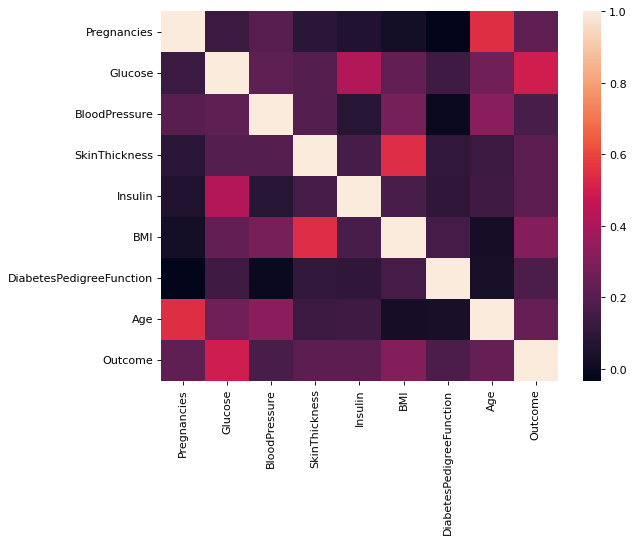

In [75]:
# The correlation between each columns are visualized using heatmap.
plt.figure(figsize=(8, 6), dpi=80)
sns.heatmap(df.corr())
plt.show()

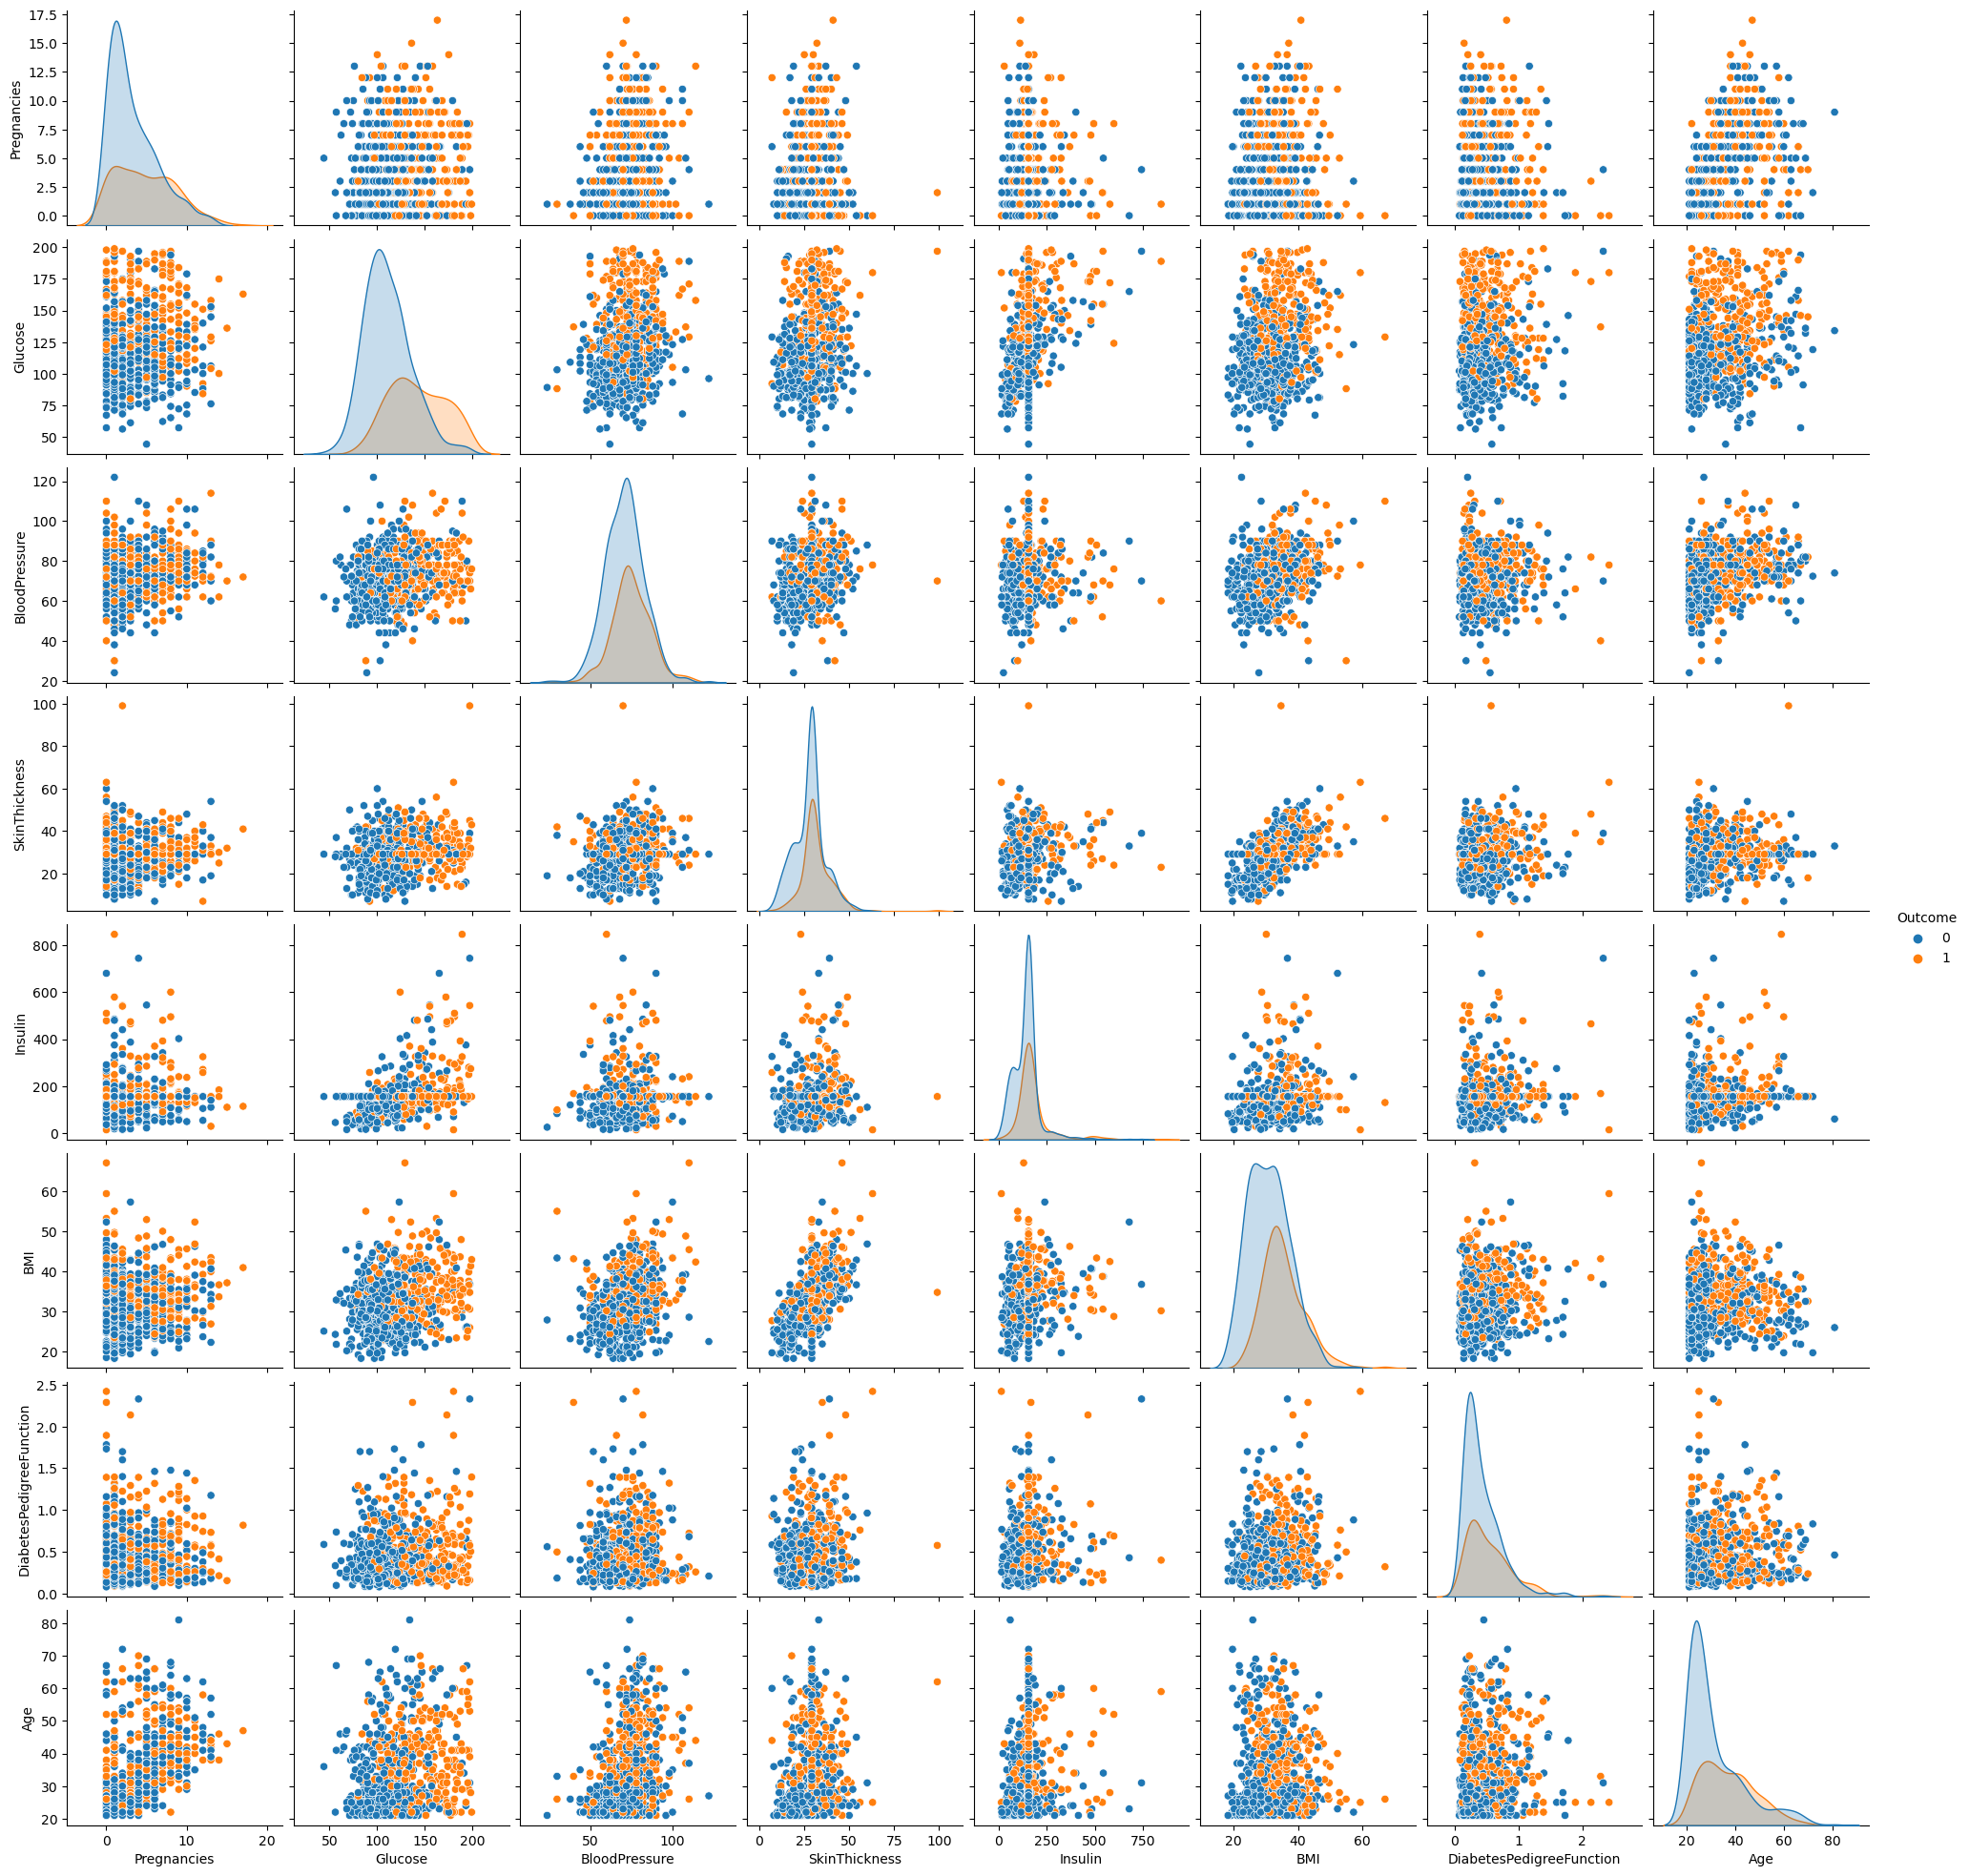

In [76]:
# Visualize pairwise relationships in a dataset.
sns.pairplot(df,hue='Outcome')

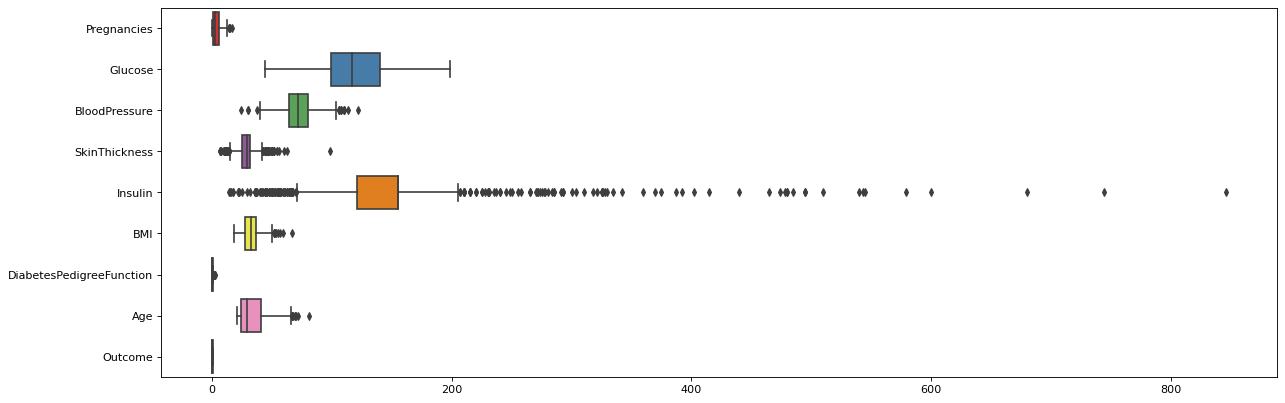

In [77]:
# Visualize attribute distributions, including median, quartiles, and outliers, enabling easy visual comparisons within a dataset.
plt.figure(figsize=(18, 6), dpi=80)
sns.boxplot(data=df, orient="h",
            palette="Set1")

plt.show()

<Axes: xlabel='Outcome', ylabel='count'>

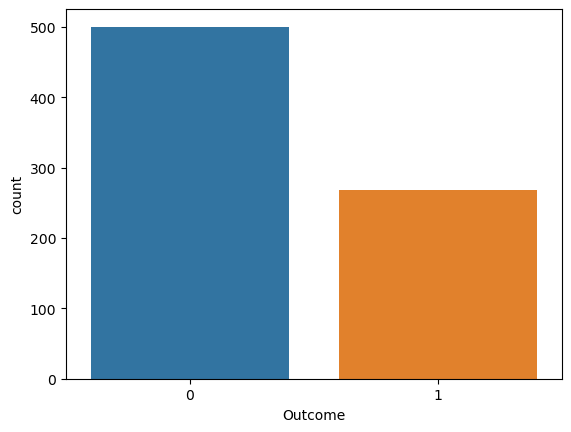

In [78]:
# Visualize the different outcomes.
sns.countplot(x="Outcome", data=df)

In [79]:
# X contains all the input features or independent variables.
X=df.drop('Outcome',axis=1)

# Y contains the target variable or dependent variable.
y=df['Outcome']

In [80]:
# Split the feature (X) and target (y) dataframes into a training set (80%) and testing set (20%).
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=0)

In [81]:
# Scale the feature variables.
scaling_x=StandardScaler()
X_train=scaling_x.fit_transform(X_train)
X_test=scaling_x.transform(X_test)

## ML Model Engineering

In [82]:
# Train the model.
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

# The predictions.
y_pred=rfc.predict(X_test)

# Evaluate the performance of our model using test dataset.
rfc.score(X_test, y_test)

0.7857142857142857

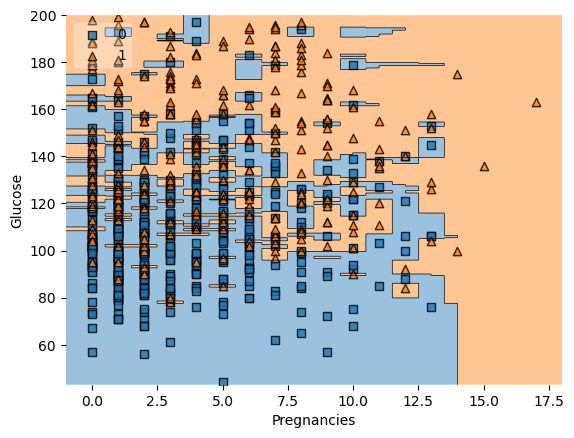

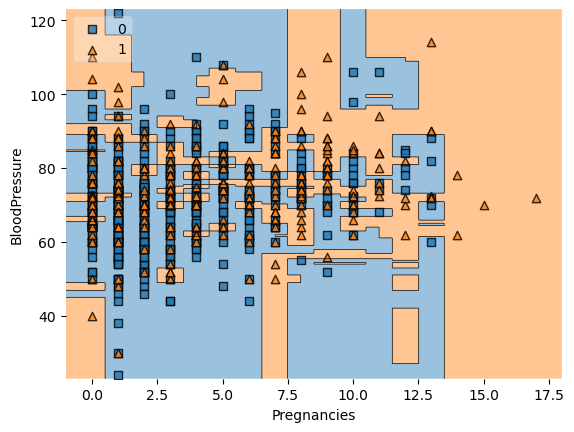

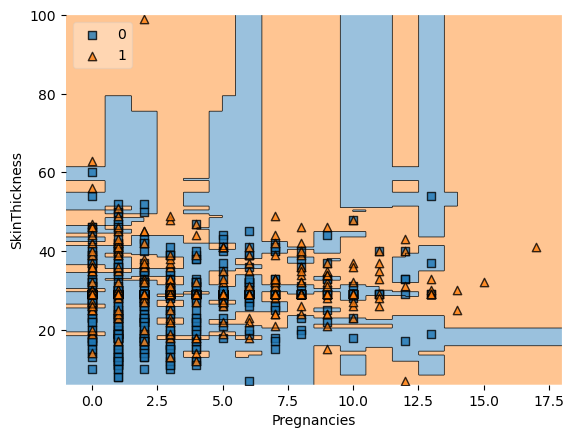

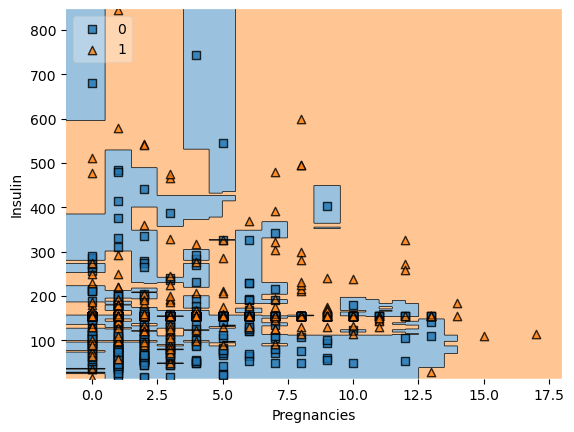

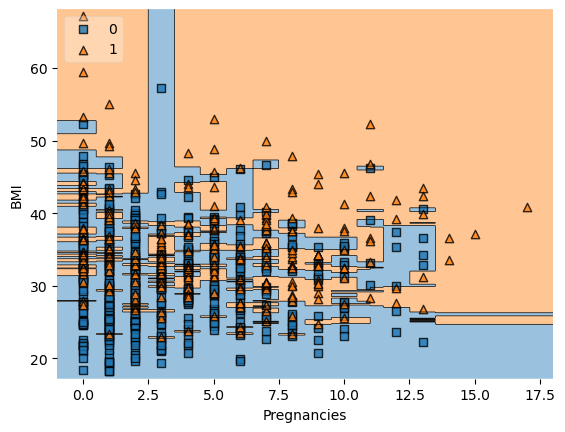

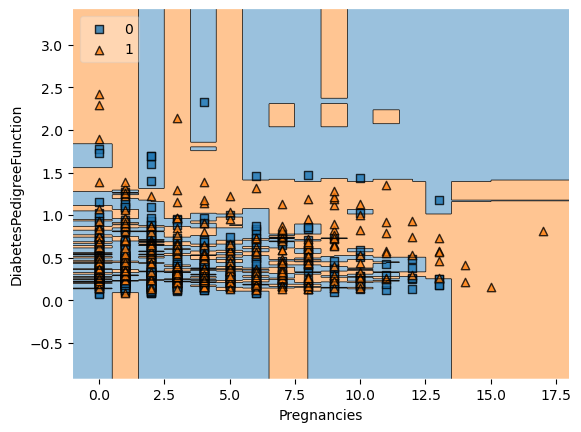

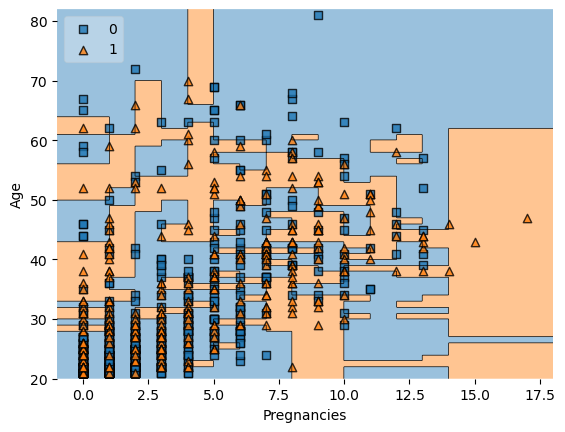

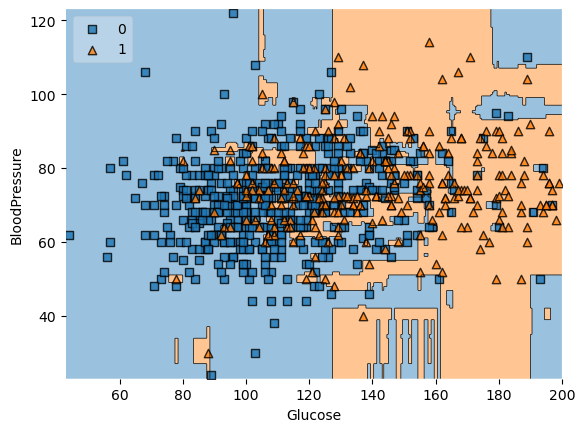

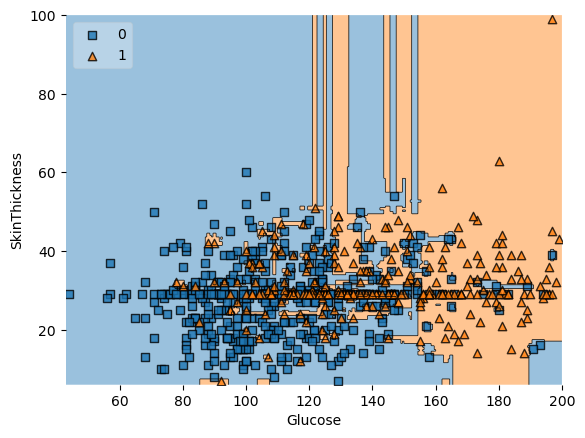

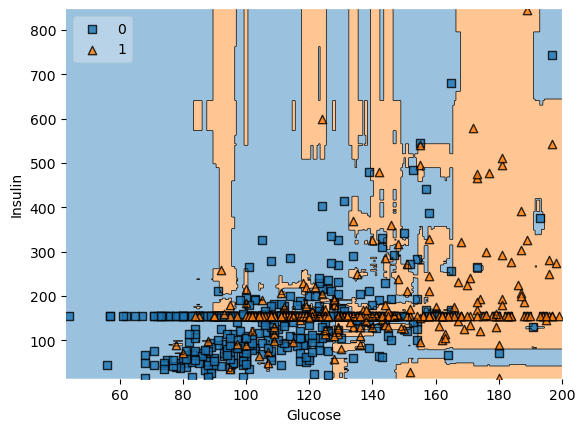

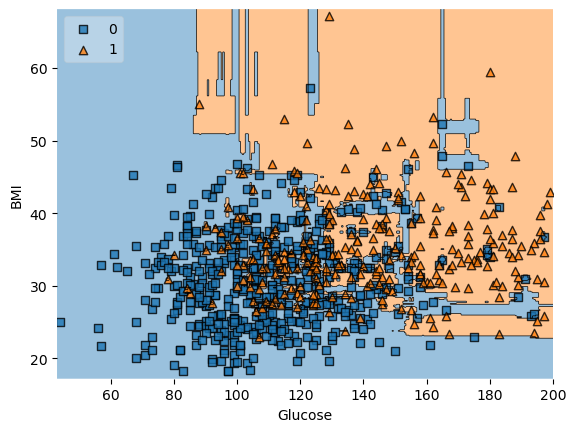

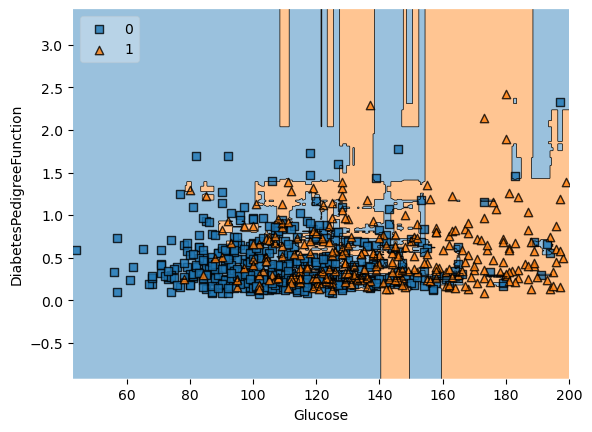

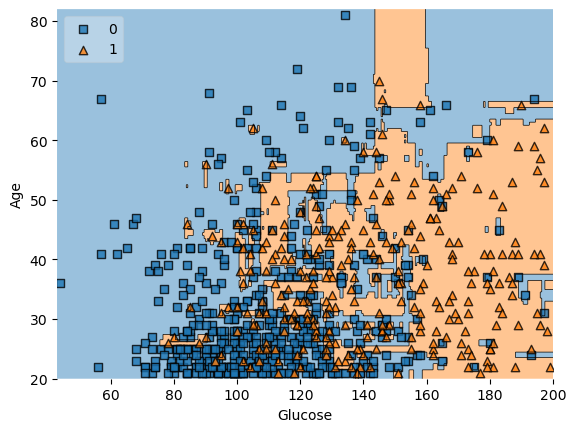

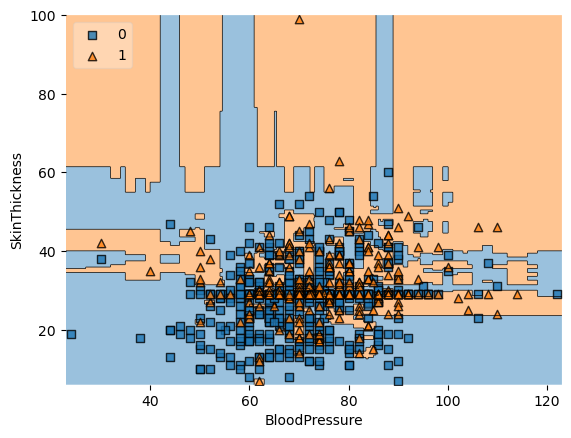

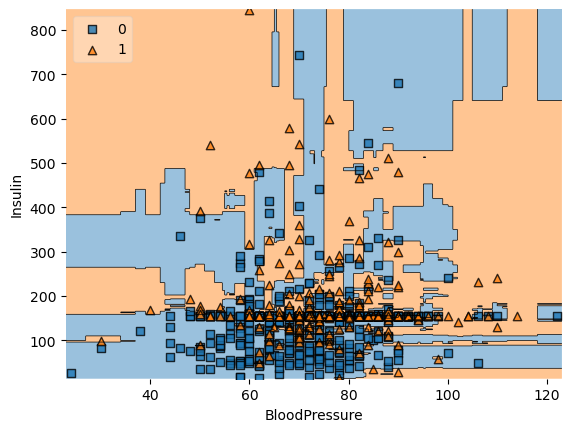

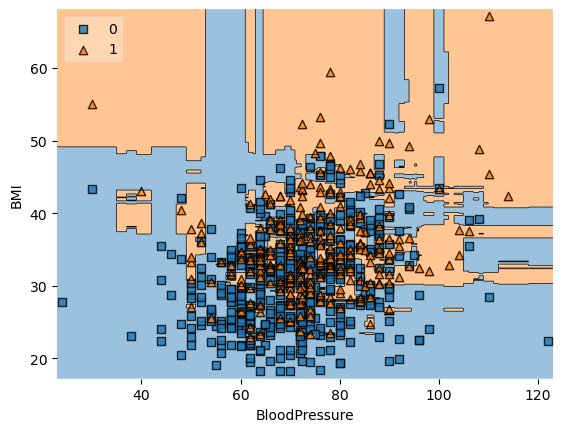

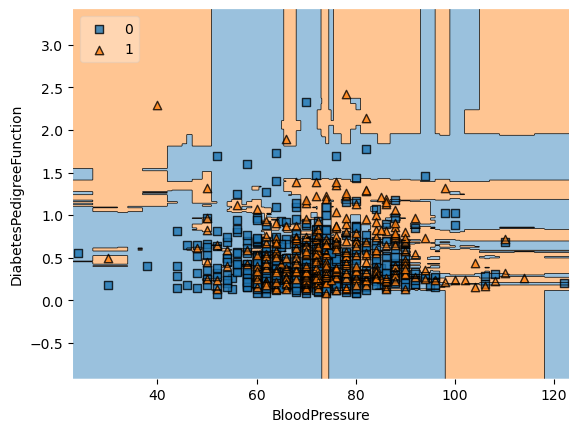

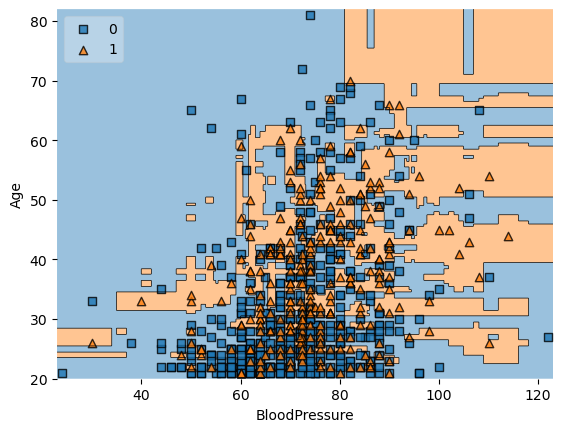

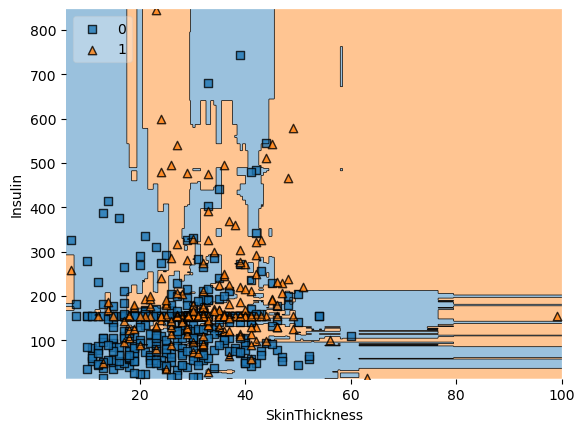

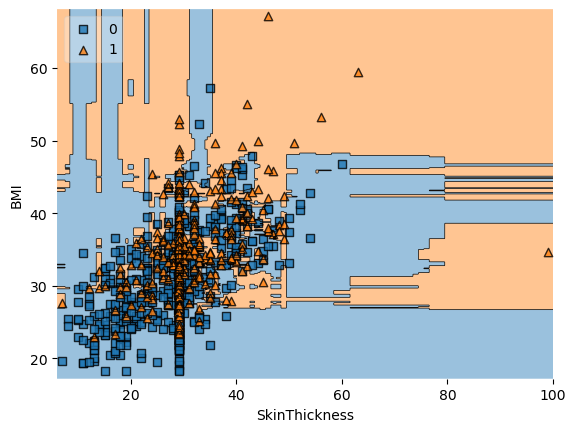

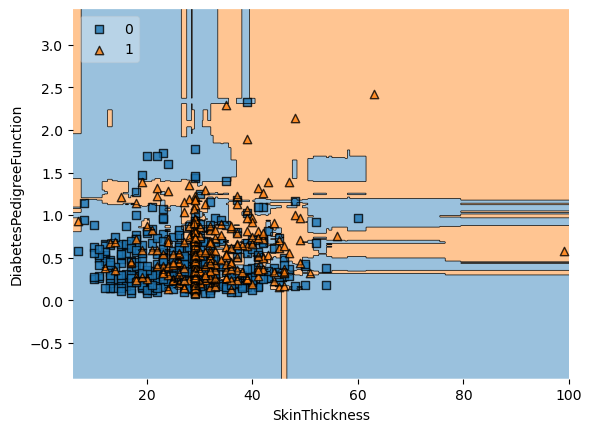

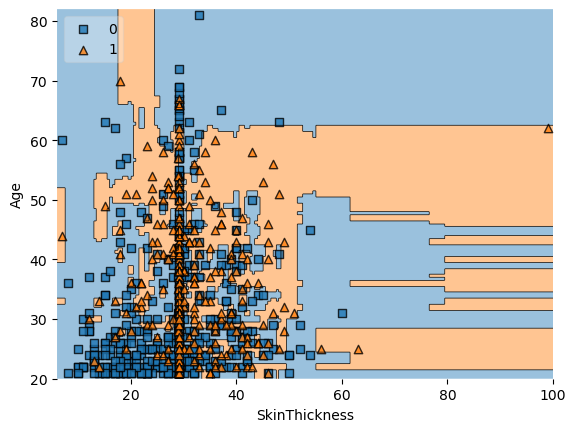

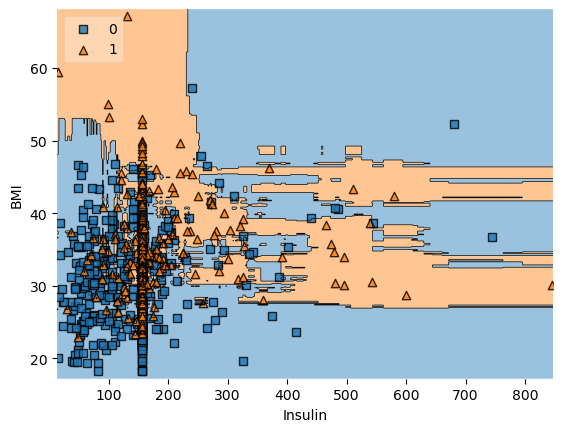

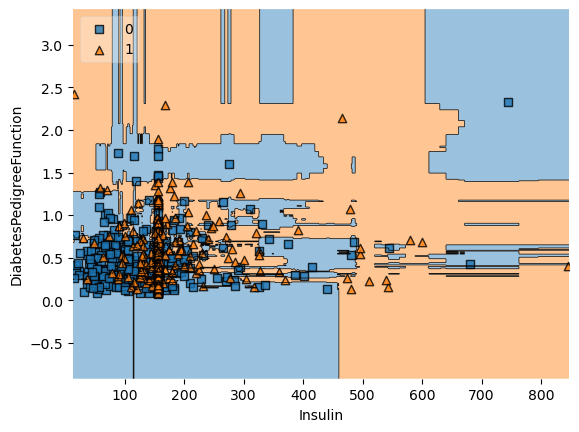

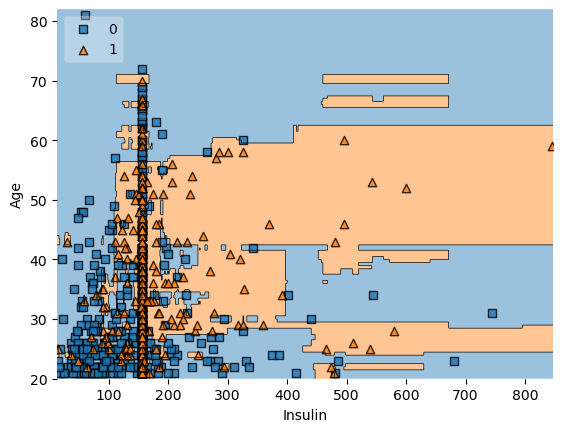

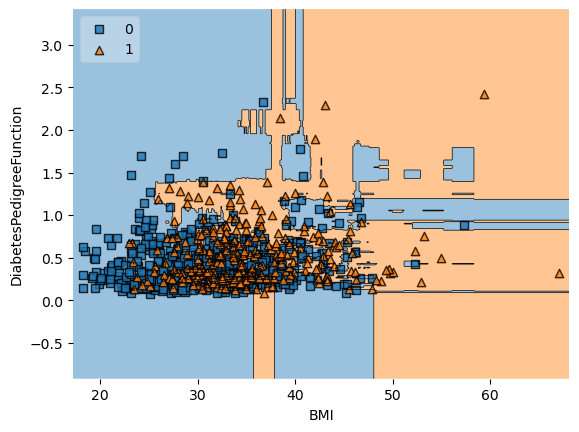

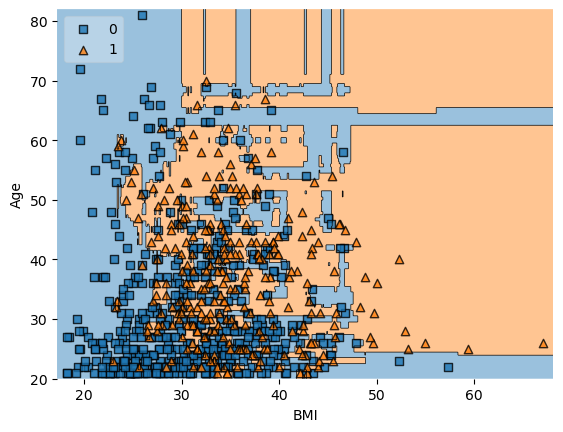

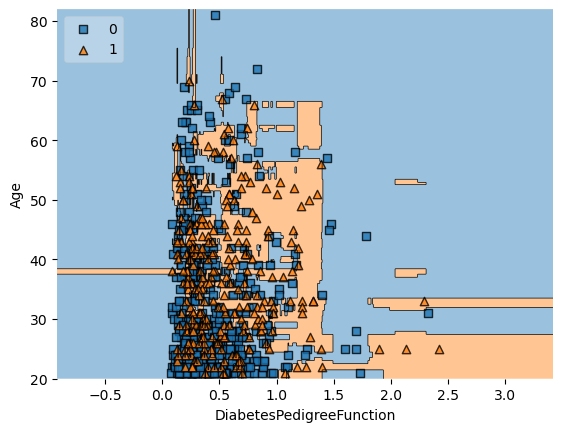

In [83]:
# Plot decision boundaries for each two possible features to see how well the model classifies the patients.
def classify_with_rfc(X,Y):
    x = df[[X,Y]].values
    y = df['Outcome'].astype(int).values

    rfc = RandomForestClassifier()
    rfc.fit(x,y)
    # Plotting decision region
    plot_decision_regions(x, y, clf=rfc, legend=2)
    # Adding axes annotations
    plt.xlabel(X)
    plt.ylabel(Y)
    plt.show()
    
feat = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']
size = len(feat)
for i in range(0,size):
    for j in range(i+1,size):
        classify_with_rfc(feat[i],feat[j])

## ML Model Evaluation

<Axes: >

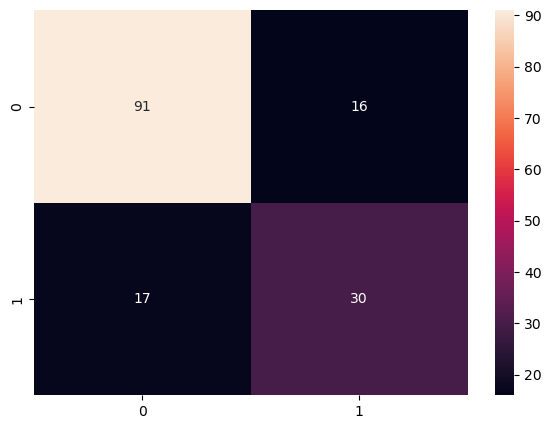

In [84]:
# Evaluate the model.
mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7, 5))
sns.heatmap(mat, annot=True)

In [85]:
# Display the confusion metrics.
target_names = ['Diabetes', 'Normal']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    Diabetes       0.84      0.85      0.85       107
      Normal       0.65      0.64      0.65        47

    accuracy                           0.79       154
   macro avg       0.75      0.74      0.75       154
weighted avg       0.78      0.79      0.79       154



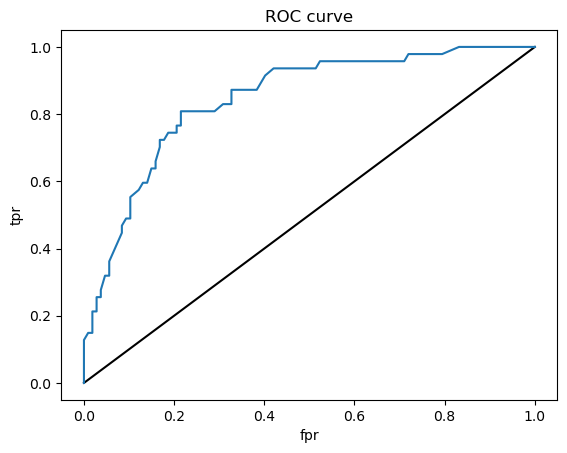

In [86]:
# The ROC curve.
y_pred_proba = rfc.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot([0,1],[0,1],'k-')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [87]:
# Area under ROC curve.
roc_auc_score(y_test,y_pred_proba)

0.8445018890435474

Area Under the Receiver Operating Characteristic Curve (ROC AUC) score is 85%.<br>
This implies that the classification model is good enough to detect the diabetic patient.

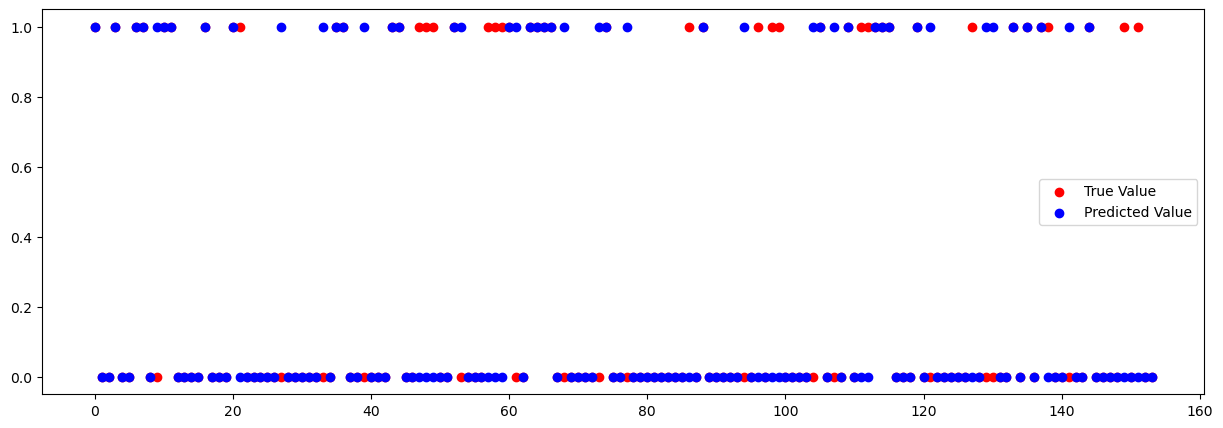

In [88]:
# The True Value vs Predicted Value.
index = np.arange(0,len(y_test))
fig, ax = plt.subplots(1,1,figsize=(15,5))
plt.scatter(index,y_test,c="red",label = 'True Value')
plt.scatter(index,y_pred,c="blue", label = 'Predicted Value')

plt.legend()

## References

https://chat.openai.com/<br>
https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database<br>
https://towardsdatascience.com/predicting-diabetes-with-random-forest-classifier-c62f2e319c6e